## Loading Data

In [1]:
import numpy as np
import pandas as pd
import os, datetime
import tensorflow as tf
import matplotlib.pyplot as plt
import re
from tensorflow.keras.models import *
from tensorflow.keras.layers import *

import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')

In [2]:
dim = 256 
seq_len =  100
batch_size = 64

In [3]:
#cpu_df = pd.read_csv('machine_317477951_1sec.csv', delimiter=',' ,skiprows=1, header=None,names = ['Start time','End time','JobID','Task Index','MachineID', 'Mean CPU usage rate', 'Canonical Memory','Assigned Memory','Unmapped page cache memory', 'Total page cache memory', 'max mem usage', 'mean disk io time','mean local disk space used', 'max cpu usage', 'max disk IO time', 'CPI','MAI','sample portion','aggregation type','sampled cpu usage'])
cpu_df = pd.read_csv('Data/machine_317477951_1sec.csv')
cpu_df.head()

,Start time,End time,JobID,Task Index,MachineID,Mean CPU usage rate,Canonical Memory,Assigned Memory,Unmapped page cache memory,Total page cache memory,max mem usage,mean disk io time,mean local disk space used,max cpu usage,max disk IO time,CPI,MAI,sample portion,aggregation type,sampled cpu usage
0,600,9.000000e+08,5.730263e+09,525.727273,317477951.0,0.027270,0.023168,0.025980,0.002832,0.004529,0.024213,0.009407,0.000207,0.074015,0.067066,4.4823,0.014957,0.0,0.363636,0.018152
1,900,1.200000e+09,5.730263e+09,525.727273,317477951.0,0.020479,0.023153,0.026226,0.002964,0.004668,0.024550,0.009241,0.000207,0.080249,0.056916,6.0173,0.020721,0.0,0.363636,0.031342
2,1200,1.500000e+09,5.730263e+09,525.727273,317477951.0,0.013459,0.020832,0.023895,0.002959,0.004661,0.021600,0.010058,0.000207,0.087393,0.073986,6.8058,0.024251,0.0,0.363636,0.022254
3,1463,1.481000e+09,6.251726e+09,1996.000000,317477951.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.0,0.000000,0.000000
4,1481,1.500000e+09,6.251726e+09,1996.000000,317477951.0,0.001499,0.000915,0.001936,0.000340,0.000656,0.001259,0.012410,0.000000,0.015440,0.045470,NaN,NaN,0.0,0.000000,0.000128


In [4]:
cpu_df.shape

(21932, 20)

In [5]:
# Changing start time from micro seconds to date
# cpu_df['Start time'] =  pd.to_datetime(cpu_df['Start time'])
# cpu_df['Start time'] = cpu_df['Start time'].apply(lambda x: re.findall(r'\d{4}-\d{2}-\d{2}\s\d{2}', str(x))[0])
# cpu_df.sort_values('Start time', inplace=True)

In [6]:
# thinking to be not needed jobid, task id , machine id, mean disk IO time, max disk IO time, sample portion

In [7]:
cpu_df.describe()

,Start time,End time,JobID,Task Index,MachineID,Mean CPU usage rate,Canonical Memory,Assigned Memory,Unmapped page cache memory,Total page cache memory,max mem usage,mean disk io time,mean local disk space used,max cpu usage,max disk IO time,CPI,MAI,sample portion,aggregation type,sampled cpu usage
count,2.193200e+04,2.193200e+04,2.193200e+04,21932.000000,21932.0,21932.000000,21932.000000,21932.000000,21932.000000,21932.000000,21932.000000,11580.000000,21932.000000,21932.000000,10825.000000,18515.000000,18515.000000,21932.0,21932.000000,21932.000000
mean,1.154662e+06,1.154802e+12,6.095327e+09,2663.689087,317477951.0,0.014664,0.013689,0.018332,0.001356,0.002236,0.014721,0.005275,0.000061,0.054488,0.029675,5.392842,0.018638,0.0,0.125521,0.008878
std,7.130614e+05,7.130793e+11,3.603949e+08,4125.508808,0.0,0.016944,0.016253,0.021167,0.001584,0.002734,0.017035,0.007230,0.000076,0.058842,0.029744,7.311432,0.025742,0.0,0.167825,0.015046
min,6.000000e+02,9.000000e+08,3.033676e+09,0.000000,317477951.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.477800,0.000010,0.0,0.000000,0.000000
25%,5.662305e+05,5.663971e+11,5.840042e+09,449.888889,317477951.0,0.000126,0.000000,0.000000,0.000000,0.000000,0.000000,0.000010,0.000000,0.001749,0.001143,2.297750,0.005298,0.0,0.000000,0.000000
50%,1.088684e+06,1.088700e+12,6.275310e+09,863.333333,317477951.0,0.007353,0.003902,0.005775,0.000483,0.000784,0.004875,0.001785,0.000023,0.045900,0.022640,4.584400,0.014645,0.0,0.000000,0.003426
75%,1.748076e+06,1.748096e+12,6.336594e+09,2566.000000,317477951.0,0.027190,0.027856,0.038279,0.002510,0.004193,0.029730,0.007948,0.000109,0.095876,0.050883,7.027801,0.026138,0.0,0.307692,0.012970
max,2.505900e+06,2.506200e+12,6.486553e+09,41195.000000,317477951.0,0.203100,0.104100,0.105700,0.026120,0.042420,0.105600,0.053888,0.000530,1.786289,0.269550,326.000000,0.787900,0.0,1.000000,0.252400


In [8]:
cpu_df.isna().sum()

Start time                        0
End time                          0
JobID                             0
Task Index                        0
MachineID                         0
Mean CPU usage rate               0
Canonical Memory                  0
Assigned Memory                   0
Unmapped page cache memory        0
Total page cache memory           0
max mem usage                     0
mean disk io time             10352
mean local disk space used        0
max cpu usage                     0
max disk IO time              11107
CPI                            3417
MAI                            3417
sample portion                    0
aggregation type                  0
sampled cpu usage                 0
dtype: int64

In [9]:
# thinking to be not needed jobid, task id , machine id, mean disk IO time, max disk IO time, sample portion

In [10]:
cpu_df.columns

Index(['Start time', 'End time', 'JobID', 'Task Index', 'MachineID',
       'Mean CPU usage rate', 'Canonical Memory', 'Assigned Memory',
       'Unmapped page cache memory', 'Total page cache memory',
       'max mem usage', 'mean disk io time', 'mean local disk space used',
       'max cpu usage', 'max disk IO time', 'CPI', 'MAI', 'sample portion',
       'aggregation type', 'sampled cpu usage'],
      dtype='object')

In [11]:
cpu_df = cpu_df.drop(['mean disk io time','max disk IO time','sample portion','MachineID', 'Task Index', 'JobID', 'End time'], axis = 1)

In [12]:
cpu_df['CPI'].fillna(inplace=True, method='ffill') 
cpu_df['MAI'].fillna(inplace=True, method='ffill')

In [13]:
cpu_df.isna().sum()

Start time                    0
Mean CPU usage rate           0
Canonical Memory              0
Assigned Memory               0
Unmapped page cache memory    0
Total page cache memory       0
max mem usage                 0
mean local disk space used    0
max cpu usage                 0
CPI                           0
MAI                           0
aggregation type              0
sampled cpu usage             0
dtype: int64

## EDA

In [14]:
# removing aggregation type, MAI, CPI, mean local disk space
cpu_df1 = cpu_df.copy()

In [15]:
cpu_df1 = cpu_df1.drop(['MAI','CPI','mean local disk space used','aggregation type'], axis = 1)

In [16]:
cpu_df1.head()

,Start time,Mean CPU usage rate,Canonical Memory,Assigned Memory,Unmapped page cache memory,Total page cache memory,max mem usage,max cpu usage,sampled cpu usage
0,600,0.027270,0.023168,0.025980,0.002832,0.004529,0.024213,0.074015,0.018152
1,900,0.020479,0.023153,0.026226,0.002964,0.004668,0.024550,0.080249,0.031342
2,1200,0.013459,0.020832,0.023895,0.002959,0.004661,0.021600,0.087393,0.022254
3,1463,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,1481,0.001499,0.000915,0.001936,0.000340,0.000656,0.001259,0.015440,0.000128


In [17]:
cpu_df = cpu_df1.copy()

## Plotting

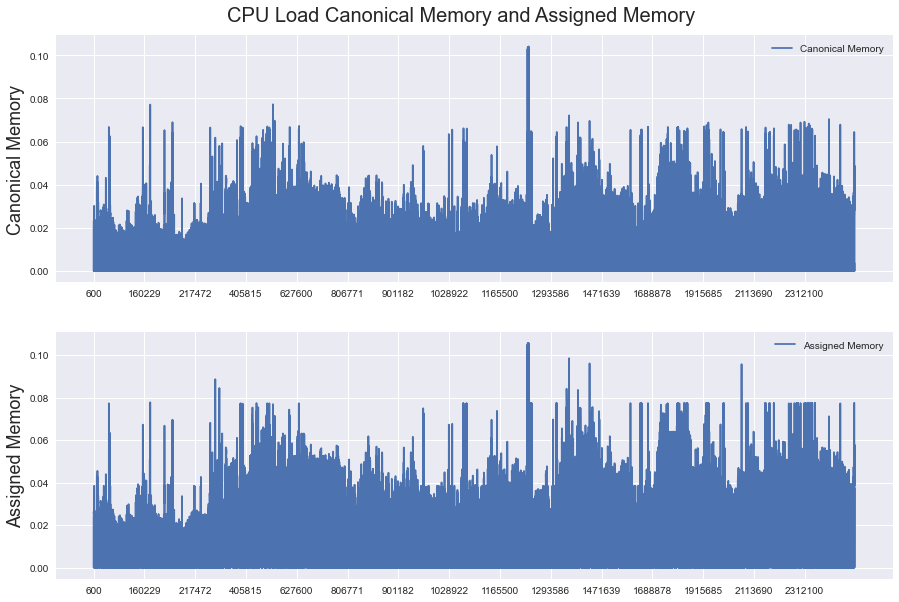

In [18]:
fig = plt.figure(figsize=(15,10))
title = fig.suptitle("CPU Load Canonical Memory and Assigned Memory", fontsize=20)
title.set_y(0.92)

axis1 = fig.add_subplot(211)
axis1.plot(cpu_df['Canonical Memory'], label='Canonical Memory')
axis1.set_xticks(range(0, cpu_df.shape[0], 1464))
axis1.set_xticklabels(cpu_df['Start time'].loc[::1464])
axis1.set_ylabel('Canonical Memory', fontsize=18)
axis1.legend()

axis2 = fig.add_subplot(212)
axis2.plot(cpu_df['Assigned Memory'], label='Assigned Memory')
axis2.set_xticks(range(0, cpu_df.shape[0], 1464))
axis2.set_xticklabels(cpu_df['Start time'].loc[::1464])
axis2.set_ylabel('Assigned Memory', fontsize=18)
axis2.legend()

## Making data statonary

In [19]:
cpu_df.shape

(21932, 9)

In [22]:
# Method 1: Differencing and seasonal differencing(seasonal diff = shift(7))
cpu_df['mcur'] = cpu_df['Mean CPU usage rate'] - cpu_df['Mean CPU usage rate'].shift(1)

In [20]:
# Method 2: Transformation + differencing
cpu_df['mcur1'] = np.log(cpu_df['Mean CPU usage rate'])
# cpu_df['mcur1'] = np.sqrt(cpu_df['Mean CPU usage rate'])
# cpu_df['mcur1'] = np.cbrt(cpu_df['Mean CPU usage rate'])

cpu_df['mcur1'] = cpu_df['mcur1'] - cpu_df['mcur1'].shift(1)

In [20]:
# Method 3: Rolling Statistics
cpu_df['mcur2'] = cpu_df['Mean CPU usage rate'].rolling(window = 7).mean()

In [21]:
cpu_df.shape

(21932, 10)

In [22]:
cpu_df.head(10)

,Start time,Mean CPU usage rate,Canonical Memory,Assigned Memory,Unmapped page cache memory,Total page cache memory,max mem usage,max cpu usage,sampled cpu usage,mcur2
0,600,0.027270,0.023168,0.025980,0.002832,0.004529,0.024213,0.074015,0.018152,NaN
1,900,0.020479,0.023153,0.026226,0.002964,0.004668,0.024550,0.080249,0.031342,NaN
2,1200,0.013459,0.020832,0.023895,0.002959,0.004661,0.021600,0.087393,0.022254,NaN
3,1463,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
4,1481,0.001499,0.000915,0.001936,0.000340,0.000656,0.001259,0.015440,0.000128,NaN
5,1500,0.034299,0.020290,0.023192,0.002779,0.004387,0.021385,0.086939,0.032134,NaN
6,1800,0.032696,0.020537,0.023504,0.002890,0.004482,0.021291,0.097375,0.020357,0.018529
7,2100,0.032231,0.020442,0.023409,0.002836,0.004428,0.021159,0.094861,0.023492,0.019238
8,2400,0.027530,0.021041,0.023948,0.002669,0.004261,0.021847,0.093672,0.021207,0.020245
9,2700,0.025579,0.021638,0.024446,0.002523,0.004117,0.022602,0.077665,0.012765,0.021976


In [23]:
cpu_df = cpu_df.iloc[6: , :]

In [24]:
cpu_df.head()

,Start time,Mean CPU usage rate,Canonical Memory,Assigned Memory,Unmapped page cache memory,Total page cache memory,max mem usage,max cpu usage,sampled cpu usage,mcur2
6,1800,0.032696,0.020537,0.023504,0.002890,0.004482,0.021291,0.097375,0.020357,0.018529
7,2100,0.032231,0.020442,0.023409,0.002836,0.004428,0.021159,0.094861,0.023492,0.019238
8,2400,0.027530,0.021041,0.023948,0.002669,0.004261,0.021847,0.093672,0.021207,0.020245
9,2700,0.025579,0.021638,0.024446,0.002523,0.004117,0.022602,0.077665,0.012765,0.021976
10,3000,0.021718,0.022023,0.024882,0.002524,0.004123,0.022539,0.090663,0.015075,0.025079


## Train test split

In [25]:
# Train-Test split
no_rows = sorted(cpu_df.index.values)
last_10p = sorted(cpu_df.index.values)[-int(0.1*len(no_rows))]
last_20p = sorted(cpu_df.index.values)[-int(0.2*len(no_rows))]

df_train = cpu_df[(cpu_df.index < last_20p)]  # Training data are 80% of total data
df_val = cpu_df[(cpu_df.index >= last_20p) & (cpu_df.index < last_10p)] # Validation and test data 10% each
df_test = cpu_df[(cpu_df.index >= last_10p)]

In [26]:
# Remove date column
df_train.drop(columns=['Start time'], inplace=True)
df_val.drop(columns=['Start time'], inplace=True)
df_test.drop(columns=['Start time'], inplace=True)

In [27]:
df_train.shape

(17541, 9)

In [28]:
# Convert pandas columns into arrays
train_data = df_train.values
val_data = df_val.values
test_data = df_test.values
print('Training data: {0}'.format(train_data.shape))
print('Validation data: {0}'.format(val_data.shape))
print('Test data: {0}'.format(test_data.shape))

df_train.head(40)

Training data: (17541, 9)
Validation data: (2193, 9)
Test data: (2192, 9)


,Mean CPU usage rate,Canonical Memory,Assigned Memory,Unmapped page cache memory,Total page cache memory,max mem usage,max cpu usage,sampled cpu usage,mcur2
6,0.032696,0.020537,0.023504,0.002890,0.004482,0.021291,0.097375,0.020357,0.018529
7,0.032231,0.020442,0.023409,0.002836,0.004428,0.021159,0.094861,0.023492,0.019238
8,0.027530,0.021041,0.023948,0.002669,0.004261,0.021847,0.093672,0.021207,0.020245
9,0.025579,0.021638,0.024446,0.002523,0.004117,0.022602,0.077665,0.012765,0.021976
10,0.021718,0.022023,0.024882,0.002524,0.004123,0.022539,0.090663,0.015075,0.025079
11,0.000354,0.000000,0.000000,0.000000,0.000000,0.000000,0.006012,0.000000,0.024915
12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020015
13,0.030064,0.022192,0.025054,0.002832,0.004529,0.023699,0.087195,0.023678,0.019639
14,0.030182,0.022843,0.025564,0.002884,0.004585,0.023392,0.093370,0.012618,0.019347
15,0.025936,0.022445,0.025385,0.002825,0.004524,0.023173,0.087324,0.015631,0.019119


## Plot daily changes of close prices and volume

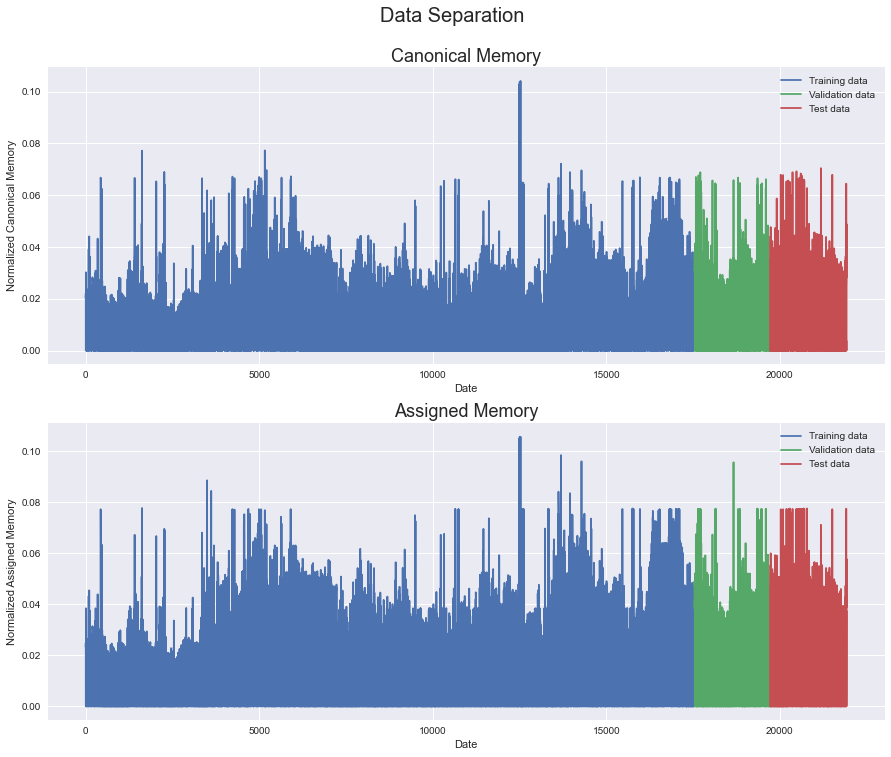

In [29]:
fig = plt.figure(figsize=(15,12))
title = fig.suptitle("Data Separation", fontsize=20)
title.set_y(0.95)

# Plotting normalized Close prices
axis1 = fig.add_subplot(211)
axis1.plot(np.arange(train_data.shape[0]), df_train['Canonical Memory'], label='Training data')
axis1.plot(np.arange(train_data.shape[0], train_data.shape[0]+val_data.shape[0]), df_val['Canonical Memory'], label='Validation data')
axis1.plot(np.arange(train_data.shape[0]+val_data.shape[0],  train_data.shape[0]+val_data.shape[0]+test_data.shape[0]), df_test['Canonical Memory'], label='Test data')
axis1.set_xlabel('Date')
axis1.set_ylabel('Normalized Canonical Memory')
axis1.set_title("Canonical Memory", fontsize=18)
axis1.legend()

# Plotting normalized volume changes
axis2 = fig.add_subplot(212)
axis2.plot(np.arange(train_data.shape[0]), df_train['Assigned Memory'], label='Training data')
axis2.plot(np.arange(train_data.shape[0], train_data.shape[0]+val_data.shape[0]), df_val['Assigned Memory'], label='Validation data')
axis2.plot(np.arange(train_data.shape[0]+val_data.shape[0], train_data.shape[0]+val_data.shape[0]+test_data.shape[0]), df_test['Assigned Memory'], label='Test data')
axis2.set_xlabel('Date')
axis2.set_ylabel('Normalized Assigned Memory')
axis2.set_title("Assigned Memory", fontsize=18)
axis2.legend()

## Generating training, validation and test data seqences

In [32]:
seq_len =100
# Training data
X_train, y_train = [], []
for i in range(seq_len, len(train_data)):
    X_train.append(train_data[i - seq_len:i,8])
    y_train.append(train_data[:, 8][i]) 
X_train, y_train = np.array(X_train), np.array(y_train)


# Validation data
X_val, y_val = [], []
for i in range(seq_len, len(val_data)):
    X_val.append(val_data[i-seq_len:i,8])
    y_val.append(val_data[:, 8][i])
X_val, y_val = np.array(X_val), np.array(y_val)


# Test data
X_test, y_test = [], []
for i in range(seq_len, len(test_data)):
    X_test.append(test_data[i-seq_len:i,8])
    y_test.append(test_data[:, 8][i])
X_test, y_test = np.array(X_test), np.array(y_test)

print('Training seq shape:', X_train.shape, y_train.shape)
print('Validation seq shape:', X_val.shape, y_val.shape)
print('Testing seq shape:' ,X_test.shape, y_test.shape)

Training seq shape: (17441, 100) (17441,)
Validation seq shape: (2093, 100) (2093,)
Testing seq shape: (2092, 100) (2092,)


## Layers

In [33]:
# Time2Vector Layer

class Time2Vector(Layer):
    def __init__(self, seq_len, **kwargs):
        super(Time2Vector, self).__init__()
        self.seq_len = seq_len

    def build(self, input_shape):
        self.weights_linear = self.add_weight(name='weight_linear', shape=(int(self.seq_len),), initializer='uniform', 
                                              trainable=True)
        self.bias_linear = self.add_weight(name='bias_linear', shape=(int(self.seq_len),), initializer='uniform', 
                                           trainable=True)
        self.weights_periodic = self.add_weight(name='weight_periodic', shape=(int(self.seq_len),), initializer='uniform', 
                                                trainable=True)
        self.bias_periodic = self.add_weight(name='bias_periodic', shape=(int(self.seq_len),), initializer='uniform', 
                                             trainable=True)

    def call(self, x):
        x = tf.math.reduce_mean(x[:,:,:4], axis=-1) 
        time_linear = self.weights_linear * x + self.bias_linear 
        time_linear = tf.expand_dims(time_linear, axis=-1)
    
        time_periodic = tf.math.sin(tf.multiply(x, self.weights_periodic) + self.bias_periodic)
        time_periodic = tf.expand_dims(time_periodic, axis=-1)
        
        return tf.concat([time_linear, time_periodic], axis=-1)
   
    def get_config(self): 
        config = super().get_config().copy()
        config.update({'seq_len': self.seq_len})
        return config

## Model

In [34]:
# Dropout.
# Layers.
# Regularization.
# Optimization Algorithm.
# Loss Function. 
# Features and Timesteps. 
# Larger Batch Size.

In [35]:
# 1. You can difference your series
# 2. You can denoise.
# 3. You can remove seasonality.

In [40]:
def build_model():
    time = Time2Vector(seq_len)
    lstm1 = LSTM(64,return_sequences=True, activation='relu')
    lstm2=  LSTM(32, activation='relu')
    lstm3=  LSTM(12, activation='relu')
    
    inp = Input(shape=(seq_len, 1))
    x = time(inp)
    x= Concatenate(axis=-1)([inp, x])
    x = lstm1((x))
    #x = Dropout(0.2)(x)
    x = lstm2((x))
#     x = lstm3((x))
    x = Dense(10, activation='relu')(x)
    #x = Dropout(0.2)(x)
    out = Dense(1)(x)
    
    m = Model(inp, out)
    m.compile(loss='mse', optimizer='adam', metrics=['mae', tf.keras.metrics.RootMeanSquaredError()])
    
    return m

In [41]:
model = build_model()
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 100, 1)]     0                                            
__________________________________________________________________________________________________
time2_vector_2 (Time2Vector)    (None, 100, 2)       400         input_3[0][0]                    
__________________________________________________________________________________________________
concatenate_2 (Concatenate)     (None, 100, 3)       0           input_3[0][0]                    
                                                                 time2_vector_2[0][0]             
__________________________________________________________________________________________________
lstm_6 (LSTM)                   (None, 100, 64)      17408       concatenate_2[0][0]        

In [42]:
model = build_model()
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 100, 1)]     0                                            
__________________________________________________________________________________________________
time2_vector_3 (Time2Vector)    (None, 100, 2)       400         input_4[0][0]                    
__________________________________________________________________________________________________
concatenate_3 (Concatenate)     (None, 100, 3)       0           input_4[0][0]                    
                                                                 time2_vector_3[0][0]             
__________________________________________________________________________________________________
lstm_9 (LSTM)                   (None, 100, 64)      17408       concatenate_3[0][0]        

In [43]:
callback = tf.keras.callbacks.ModelCheckpoint('Models/LSTM_S.hdf5', monitor='val_loss', save_best_only=True, verbose=1)
history = model.fit(X_train, y_train, batch_size=32, epochs=13, callbacks=[callback],  validation_data=(X_val, y_val))  

Epoch 1/13
546/546 [==============================] - 26s 43ms/step - loss: 5.6463e-05 - mae: 0.0056 - root_mean_squared_error: 0.0075 - val_loss: 4.2204e-05 - val_mae: 0.0049 - val_root_mean_squared_error: 0.0065

Epoch 00001: val_loss improved from inf to 0.00004, saving model to Models\LSTM_S.hdf5
Epoch 2/13
546/546 [==============================] - 26s 47ms/step - loss: 2.3119e-05 - mae: 0.0036 - root_mean_squared_error: 0.0048 - val_loss: 1.7289e-05 - val_mae: 0.0032 - val_root_mean_squared_error: 0.0042

Epoch 00002: val_loss improved from 0.00004 to 0.00002, saving model to Models\LSTM_S.hdf5
Epoch 3/13
546/546 [==============================] - 28s 51ms/step - loss: 1.3480e-05 - mae: 0.0028 - root_mean_squared_error: 0.0037 - val_loss: 1.2324e-05 - val_mae: 0.0027 - val_root_mean_squared_error: 0.0035

Epoch 00003: val_loss improved from 0.00002 to 0.00001, saving model to Models\LSTM_S.hdf5
Epoch 4/13
546/546 [==============================] - 22s 41ms/step - loss: 1.0349e-05

In [47]:
model = tf.keras.models.load_model('Models/LSTM_S.hdf5', custom_objects={'Time2Vector': Time2Vector})

## Evaluation

In [50]:
train_pred = model.predict(X_train)
val_pred = model.predict(X_val)
test_pred = model.predict(X_test)

# Evaluation for train, val and test data
train_eval = model.evaluate(X_train, y_train, verbose=0)
val_eval = model.evaluate(X_val, y_val, verbose=0)
test_eval = model.evaluate(X_test, y_test, verbose=0)
print('Evaluation metrics')
print('Train Data - Loss: {:.5f}, MAE: {:.5f}, RMSE: {:.5f}'.format(train_eval[0], train_eval[1],  train_eval[2]))
print('Validation Data - Loss: {:.5f}, MAE: {:.5f}, RMSE: {:.5f}'.format(val_eval[0], val_eval[1],  val_eval[2]))
print('Test Data - Loss: {:.5f}, MAE: {:.5f}, RMSE: {:.5f}'.format(test_eval[0], test_eval[1],  test_eval[2]))

Evaluation metrics
Train Data - Loss: 0.00001, MAE: 0.00215, RMSE: 0.00288
Validation Data - Loss: 0.00001, MAE: 0.00233, RMSE: 0.00300
Test Data - Loss: 0.00001, MAE: 0.00228, RMSE: 0.00302


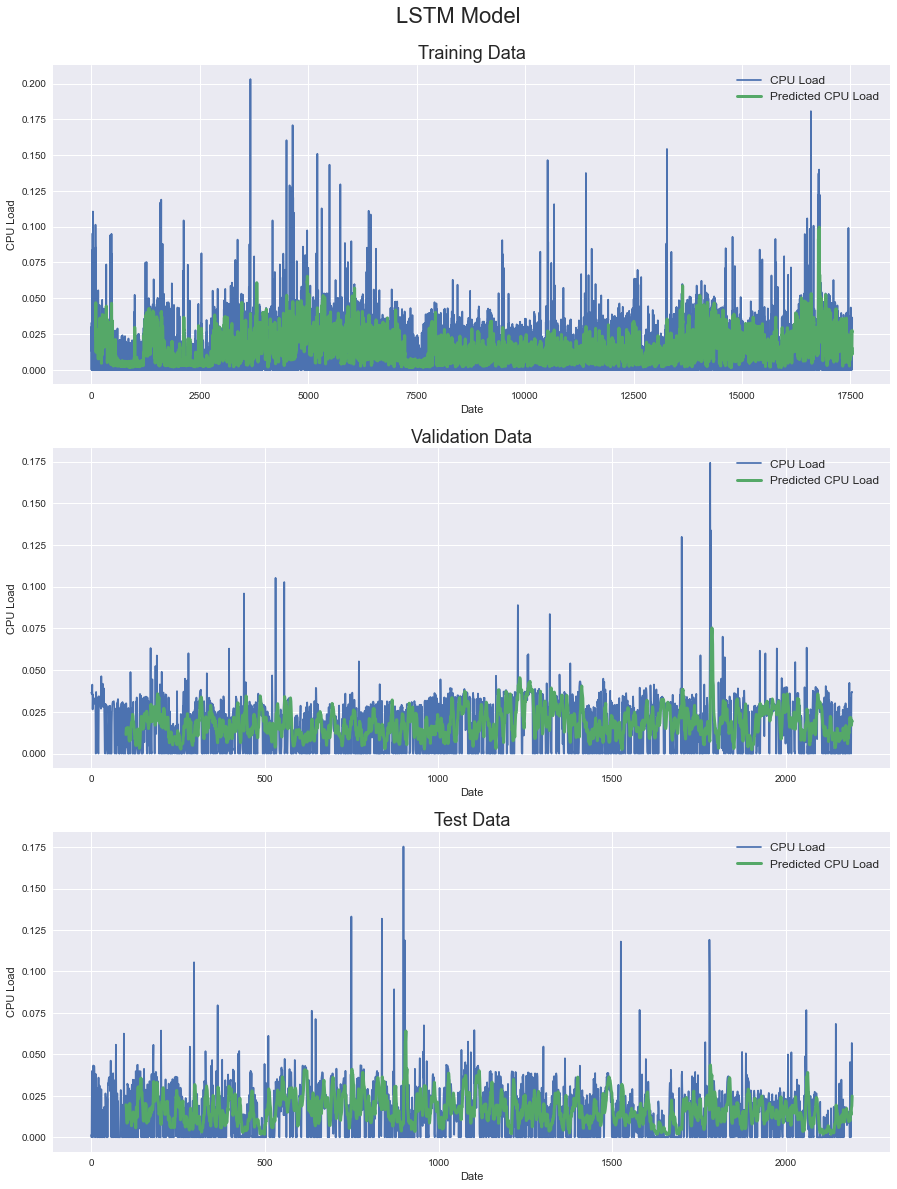

In [51]:
fig = plt.figure(figsize=(15,20))
title = fig.suptitle("LSTM Model", fontsize=22)
title.set_y(0.92)

#Plot training data results
axis1 = fig.add_subplot(311)
axis1.plot(train_data[:, 0], label='CPU Load')
axis1.plot(np.arange(seq_len, train_pred.shape[0]+seq_len), train_pred, linewidth=3, label='Predicted CPU Load')
axis1.set_title("Training Data", fontsize=18)
axis1.set_xlabel('Date')
axis1.set_ylabel('CPU Load')
axis1.legend(loc="best", fontsize=12)

#Plot validation data results
axis2 = fig.add_subplot(312)
axis2.plot(val_data[:, 0], label='CPU Load')
axis2.plot(np.arange(seq_len, val_pred.shape[0]+seq_len), val_pred, linewidth=3, label='Predicted CPU Load')
axis2.set_title("Validation Data", fontsize=18)
axis2.set_xlabel('Date')
axis2.set_ylabel('CPU Load')
axis2.legend(loc="best", fontsize=12)

#Plot test data results
axis3 = fig.add_subplot(313)
axis3.plot(test_data[:, 0], label='CPU Load')
axis3.plot(np.arange(seq_len, test_pred.shape[0]+seq_len), test_pred, linewidth=3, label='Predicted CPU Load')
axis3.set_title("Test Data", fontsize=18)
axis3.set_xlabel('Date')
axis3.set_ylabel('CPU Load')
axis3.legend(loc="best", fontsize=12)

## Model metrics

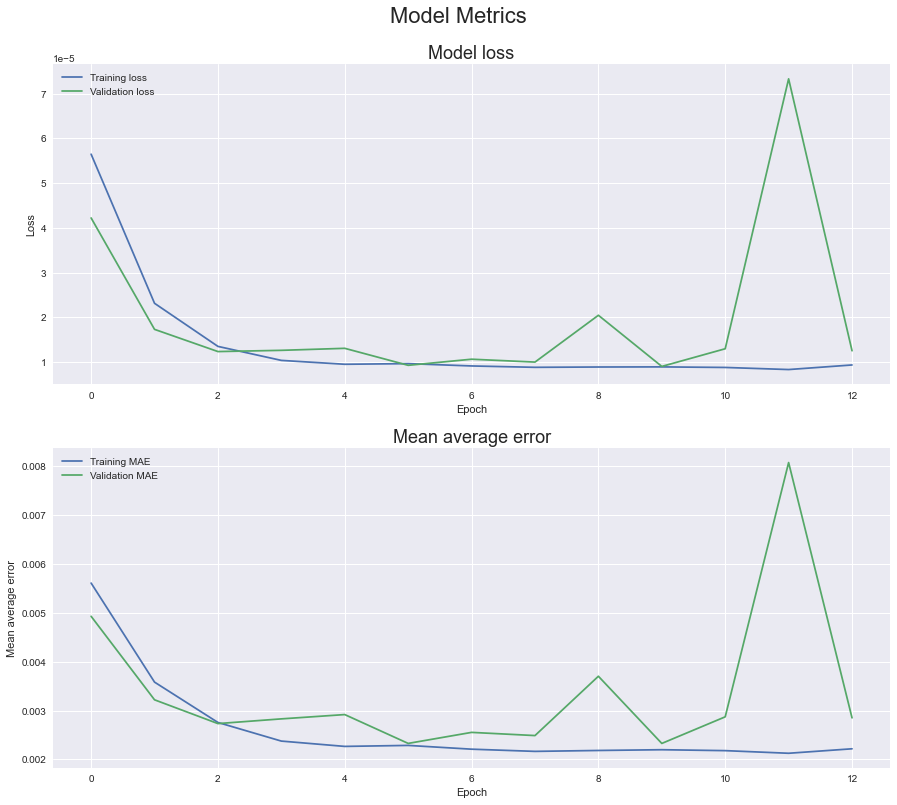

In [52]:
# Plot Model Metrics
fig = plt.figure(figsize=(15,20))
title = fig.suptitle("Model Metrics", fontsize=22)
title.set_y(0.92)

#Plot model loss
axis1 = fig.add_subplot(311)
axis1.plot(history.history['loss'], label='Training loss')
axis1.plot(history.history['val_loss'], label='Validation loss')
axis1.set_title("Model loss", fontsize=18)
axis1.set_xlabel('Epoch')
axis1.set_ylabel('Loss')
axis1.legend()

#Plot MAE
axis2 = fig.add_subplot(312)
axis2.plot(history.history['mae'], label='Training MAE')
axis2.plot(history.history['val_mae'], label='Validation MAE')
axis2.set_title("Mean average error", fontsize=18)
axis2.set_xlabel('Epoch')
axis2.set_ylabel('Mean average error')
axis2.legend()

#Plot MAPE
# axis3 = fig.add_subplot(313)
# axis3.plot(history.history['mape'], label='Training MAPE')
# axis3.plot(history.history['val_mape'], label='Validation MAPE')
# axis3.set_title("Mean average percentage error", fontsize=18)
# axis3.set_xlabel('Epoch')
# axis3.set_ylabel('Mean average percentage error')
# axis3.legend()

In [47]:
# tf.keras.utils.plot_model(
#     model,
#     to_file="Lstm.png",
#     show_shapes=True,
#     show_layer_names=True,
#     expand_nested=True,
#     dpi=96,)